In [3]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
  
# For data manipulation
import pandas as pd
import numpy as np
  
# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
  
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('GOOGL.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4382,2022-01-13,2830.800049,2857.000000,2768.179932,2771.739990,2771.739990,1571800
4383,2022-01-14,2741.580078,2814.840088,2739.969971,2789.610107,2789.610107,1482100
4384,2022-01-18,2723.500000,2742.629883,2708.770020,2719.959961,2719.959961,1743600
4385,2022-01-19,2730.469971,2759.189941,2700.310059,2702.330078,2702.330078,1432400


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4387 entries, 0 to 4386
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4387 non-null   object 
 1   Open       4387 non-null   float64
 2   High       4387 non-null   float64
 3   Low        4387 non-null   float64
 4   Close      4387 non-null   float64
 5   Adj Close  4387 non-null   float64
 6   Volume     4387 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 240.0+ KB


In [6]:
data.index = pd.to_datetime(data['Date'])
data

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2004-08-19,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
2022-01-13,2022-01-13,2830.800049,2857.000000,2768.179932,2771.739990,2771.739990,1571800
2022-01-14,2022-01-14,2741.580078,2814.840088,2739.969971,2789.610107,2789.610107,1482100
2022-01-18,2022-01-18,2723.500000,2742.629883,2708.770020,2719.959961,2719.959961,1743600


In [7]:
data = data.drop(['Date'], axis='columns')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...
2022-01-13,2830.800049,2857.000000,2768.179932,2771.739990,2771.739990,1571800
2022-01-14,2741.580078,2814.840088,2739.969971,2789.610107,2789.610107,1482100
2022-01-18,2723.500000,2742.629883,2708.770020,2719.959961,2719.959961,1743600


La X consiste en variables como 'Abrir – Cerrar' y 'Alto – Bajo'. Estos pueden entenderse como indicadores en base a los cuales el algoritmo predecirá la tendencia del mañana.

In [8]:
# Create predictor variables
data['Open-Close'] = data.Open - data.Close
data['High-Low'] = data.High - data.Low
data

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low
Date,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,-0.170170,4.054054
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,-3.653652,4.294296
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,0.675678,2.217221
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,3.188186,4.019020
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,-0.520523,2.062061
...,...,...,...,...,...,...,...,...
2022-01-13,2830.800049,2857.000000,2768.179932,2771.739990,2771.739990,1571800,59.060059,88.820068
2022-01-14,2741.580078,2814.840088,2739.969971,2789.610107,2789.610107,1482100,-48.030029,74.870117
2022-01-18,2723.500000,2742.629883,2708.770020,2719.959961,2719.959961,1743600,3.540039,33.859863


In [9]:
# Store all predictor variables in a variable X
X = data[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2004-08-19,-0.170170,4.054054
2004-08-20,-3.653652,4.294296
2004-08-23,0.675678,2.217221
2004-08-24,3.188186,4.019020
2004-08-25,-0.520523,2.062061


Y es un conjunto de datos objetivo que almacena la señal comercial correcta que el algoritmo de aprendizaje automático intentará predecir.
Si el precio de mañana es mayor que el precio de hoy, entonces compraremos la acción en particular, de lo contrario no tendremos posición en el. Almacenaremos +1 para una señal de compra y 0 para una posición de no en y

In [10]:
y = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
y

array([1, 1, 0, ..., 0, 0, 0])

Dividiremos los datos en conjuntos de datos de entrenamiento y prueba.

In [11]:
split_percentage = 0.8
split = int(split_percentage*len(data))
  
# Train data set
X_train = X[:split]
y_train = y[:split]
  
# Test data set
X_test = X[split:]
y_test = y[split:]

Clasificador de vectores de soporte (SVC)

Creación del modelo clasificador utilizando el método fit() en el conjunto de datos de entrenamiento

In [12]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

In [13]:
#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

Evaluación del modelo

In [15]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5421412300683371


In [16]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.5421412300683371
Recall: 1.0


Predeciremos la señal (comprar o vender) usando la función cls.predict().

In [17]:
data['Predicted_Signal'] = clf.predict(X)
data['Predicted_Signal']

Date
2004-08-19    1
2004-08-20    1
2004-08-23    1
2004-08-24    1
2004-08-25    1
             ..
2022-01-13    1
2022-01-14    1
2022-01-18    1
2022-01-19    1
2022-01-20    1
Name: Predicted_Signal, Length: 4387, dtype: int64

In [18]:
data

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,-0.170170,4.054054,1
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,-3.653652,4.294296,1
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,0.675678,2.217221,1
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,3.188186,4.019020,1
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,-0.520523,2.062061,1
...,...,...,...,...,...,...,...,...,...
2022-01-13,2830.800049,2857.000000,2768.179932,2771.739990,2771.739990,1571800,59.060059,88.820068,1
2022-01-14,2741.580078,2814.840088,2739.969971,2789.610107,2789.610107,1482100,-48.030029,74.870117,1
2022-01-18,2723.500000,2742.629883,2708.770020,2719.959961,2719.959961,1743600,3.540039,33.859863,1


In [25]:
conditionlist = [
    (data['Predicted_Signal'] == 1) ,
    (data['Predicted_Signal'] == 0)]
choicelist = ['Comprar','Venta']
data['Decision'] = np.select(conditionlist, choicelist)

In [26]:
data

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy,Decision
Date,,,,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,-0.170170,4.054054,1,NaN,NaN,NaN,NaN,Comprar
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,-3.653652,4.294296,1,0.079430,0.079430,0.079430,0.079430,Comprar
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,0.675678,2.217221,1,0.010064,0.010064,0.089494,0.089494,Comprar
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,3.188186,4.019020,1,-0.041408,-0.041408,0.048086,0.048086,Comprar
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,-0.520523,2.062061,1,0.010775,0.010775,0.058861,0.058861,Comprar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-13,2830.800049,2857.000000,2768.179932,2771.739990,2771.739990,1571800,59.060059,88.820068,1,-0.020105,-0.020105,4.799072,4.799072,Comprar
2022-01-14,2741.580078,2814.840088,2739.969971,2789.610107,2789.610107,1482100,-48.030029,74.870117,1,0.006447,0.006447,4.805520,4.805520,Comprar
2022-01-18,2723.500000,2742.629883,2708.770020,2719.959961,2719.959961,1743600,3.540039,33.859863,1,-0.024968,-0.024968,4.780552,4.780552,Comprar


Calcular devoluciones diarias

In [19]:
# Calculate daily returns
data['Return'] = data.Close.pct_change()
data

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return
Date,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,-0.170170,4.054054,1,NaN
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,-3.653652,4.294296,1,0.079430
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,0.675678,2.217221,1,0.010064
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,3.188186,4.019020,1,-0.041408
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,-0.520523,2.062061,1,0.010775
...,...,...,...,...,...,...,...,...,...,...
2022-01-13,2830.800049,2857.000000,2768.179932,2771.739990,2771.739990,1571800,59.060059,88.820068,1,-0.020105
2022-01-14,2741.580078,2814.840088,2739.969971,2789.610107,2789.610107,1482100,-48.030029,74.870117,1,0.006447
2022-01-18,2723.500000,2742.629883,2708.770020,2719.959961,2719.959961,1743600,3.540039,33.859863,1,-0.024968


Calcular los rendimientos de la estrategia

In [20]:
data['Strategy_Return'] = data.Return *data.Predicted_Signal.shift(1)
data

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return
Date,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,-0.170170,4.054054,1,NaN,NaN
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,-3.653652,4.294296,1,0.079430,0.079430
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,0.675678,2.217221,1,0.010064,0.010064
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,3.188186,4.019020,1,-0.041408,-0.041408
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,-0.520523,2.062061,1,0.010775,0.010775
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-13,2830.800049,2857.000000,2768.179932,2771.739990,2771.739990,1571800,59.060059,88.820068,1,-0.020105,-0.020105
2022-01-14,2741.580078,2814.840088,2739.969971,2789.610107,2789.610107,1482100,-48.030029,74.870117,1,0.006447,0.006447
2022-01-18,2723.500000,2742.629883,2708.770020,2719.959961,2719.959961,1743600,3.540039,33.859863,1,-0.024968,-0.024968


Calcular rendimientos acumulativos

In [21]:
data['Cum_Ret'] = data['Return'].cumsum()
data

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,-0.170170,4.054054,1,NaN,NaN,NaN
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,-3.653652,4.294296,1,0.079430,0.079430,0.079430
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,0.675678,2.217221,1,0.010064,0.010064,0.089494
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,3.188186,4.019020,1,-0.041408,-0.041408,0.048086
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,-0.520523,2.062061,1,0.010775,0.010775,0.058861
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-13,2830.800049,2857.000000,2768.179932,2771.739990,2771.739990,1571800,59.060059,88.820068,1,-0.020105,-0.020105,4.799072
2022-01-14,2741.580078,2814.840088,2739.969971,2789.610107,2789.610107,1482100,-48.030029,74.870117,1,0.006447,0.006447,4.805520
2022-01-18,2723.500000,2742.629883,2708.770020,2719.959961,2719.959961,1743600,3.540039,33.859863,1,-0.024968,-0.024968,4.780552


Calcular los rendimientos acumulativos de la estrategia

In [22]:
data['Cum_Strategy'] = data['Strategy_Return'].cumsum()
data

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,-0.170170,4.054054,1,NaN,NaN,NaN,NaN
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,-3.653652,4.294296,1,0.079430,0.079430,0.079430,0.079430
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,0.675678,2.217221,1,0.010064,0.010064,0.089494,0.089494
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,3.188186,4.019020,1,-0.041408,-0.041408,0.048086,0.048086
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,-0.520523,2.062061,1,0.010775,0.010775,0.058861,0.058861
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-13,2830.800049,2857.000000,2768.179932,2771.739990,2771.739990,1571800,59.060059,88.820068,1,-0.020105,-0.020105,4.799072,4.799072
2022-01-14,2741.580078,2814.840088,2739.969971,2789.610107,2789.610107,1482100,-48.030029,74.870117,1,0.006447,0.006447,4.805520,4.805520
2022-01-18,2723.500000,2742.629883,2708.770020,2719.959961,2719.959961,1743600,3.540039,33.859863,1,-0.024968,-0.024968,4.780552,4.780552


### Retornos de la estrategia de trama vs rendimientos originales

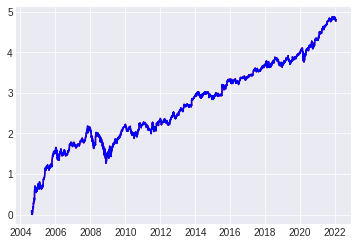

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
  
plt.plot(data['Cum_Ret'],color='red')
plt.plot(data['Cum_Strategy'],color='blue')

In [33]:
pip install plotly
candlestick = go.Candlestick(
                            x=data.index,
                            open=data['Open'],
                            high=data['High'],
                            low=data['Low'],
                            close=data['Close']
                            )

fig = go.Figure(data=[candlestick])

fig.update_layout(
    width=800, height=600,
    title="GOOGLE",
    yaxis_title='Price Stock'
)

fig.show()